In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import simplefilter
from pathlib import Path
simplefilter("ignore")  # ignore warnings to clean up output cells


In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [3]:
# Load Tunnel Traffic dataset
data_dir = Path("./datasets/tunnel.csv")
tunnel = pd.read_csv(data_dir, parse_dates=["Day"])

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
tunnel = tunnel.set_index("Day")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
tunnel = tunnel.to_period()

tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


<AxesSubplot:title={'center':'Tunnel Traffic - 365 Day Moving Average'}, xlabel='Day'>

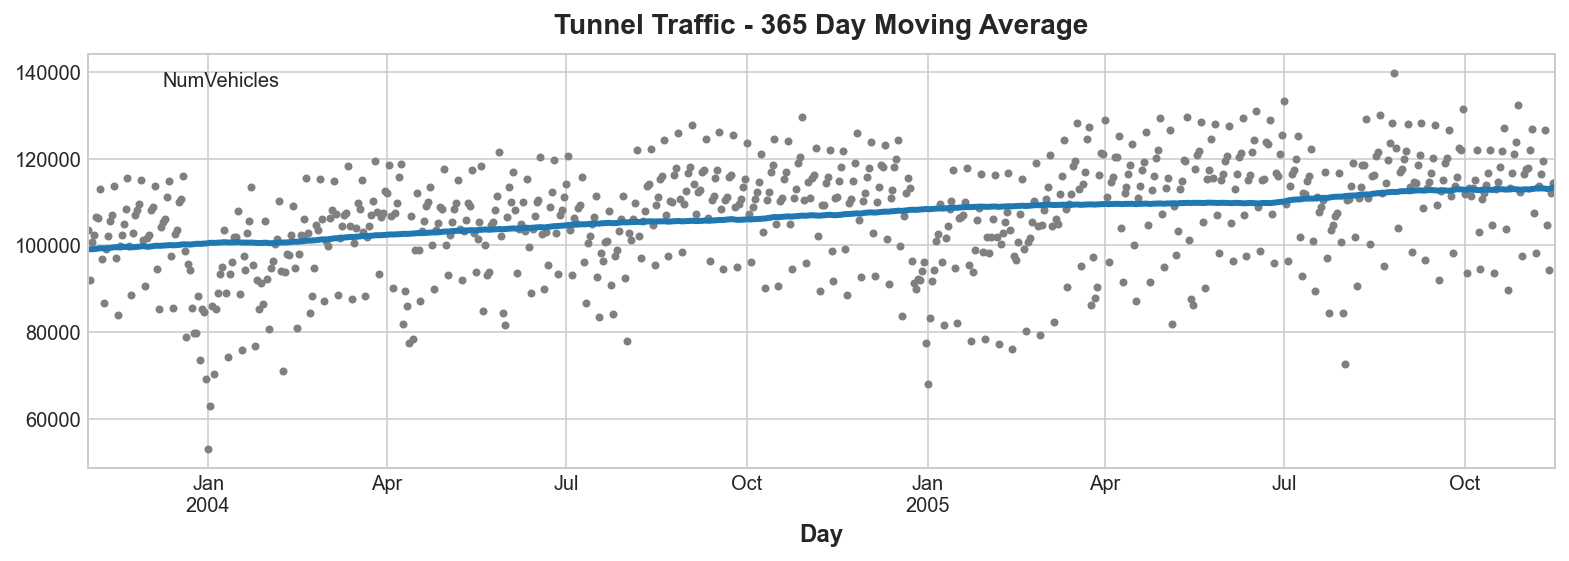

In [6]:
moving_avg = tunnel.rolling(window=365,center = True,min_periods=183).mean()

ax = tunnel.plot(style=".",color = "0.5")
moving_avg.plot(ax = ax, linewidth = 3, title = "Tunnel Traffic - 365 Day Moving Average",legend=False)

In [13]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(index=tunnel.index,constant=True,order =1, drop=True)

X = dp.in_sample()

X.head(20)

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0
2003-11-06,1.0,6.0
2003-11-07,1.0,7.0
2003-11-08,1.0,8.0
2003-11-09,1.0,9.0


In [14]:
from sklearn.linear_model import LinearRegression

y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
model.fit(X,y)

y_pred = pd.Series(model.predict(X),index=X.index)

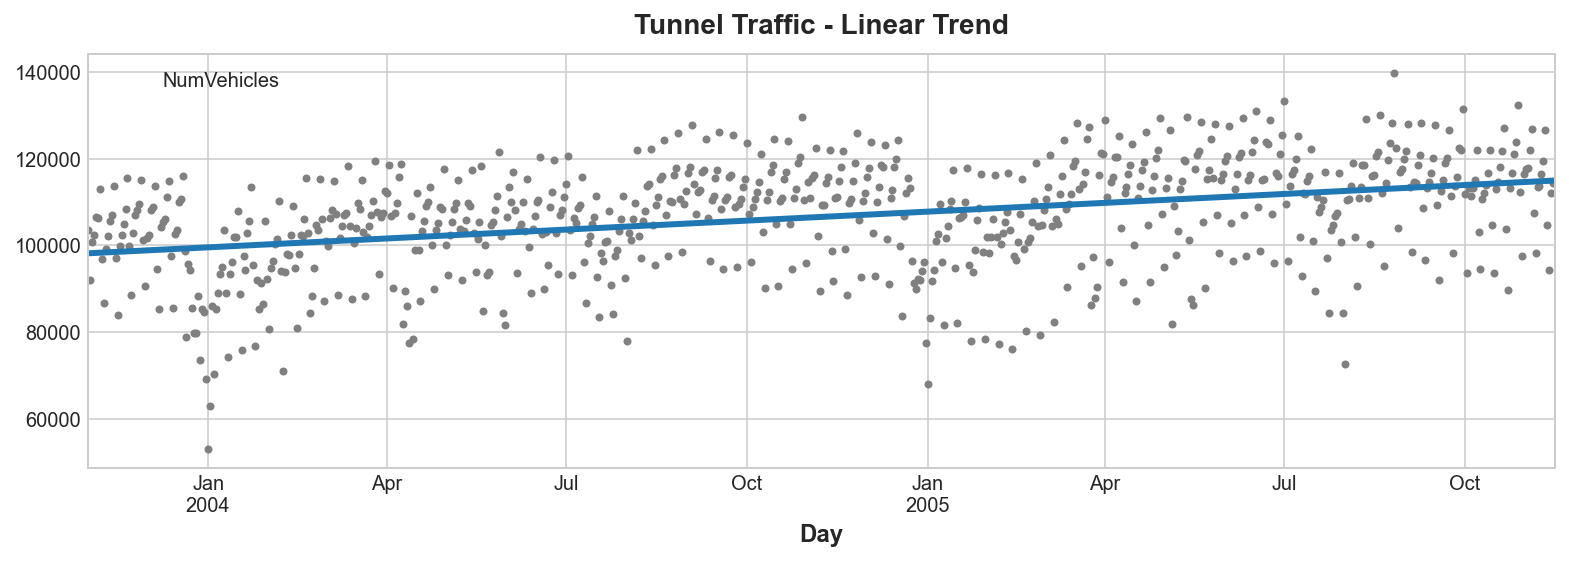

In [18]:
ax = tunnel.plot(style=".",color = "0.5")
_ = y_pred.plot(ax = ax, linewidth = 3, title = "Tunnel Traffic - Linear Trend",label = "Trend")

In [21]:
X = dp.out_of_sample(steps = 30)

y_fore = pd.Series(model.predict(X),index = X.index)

y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

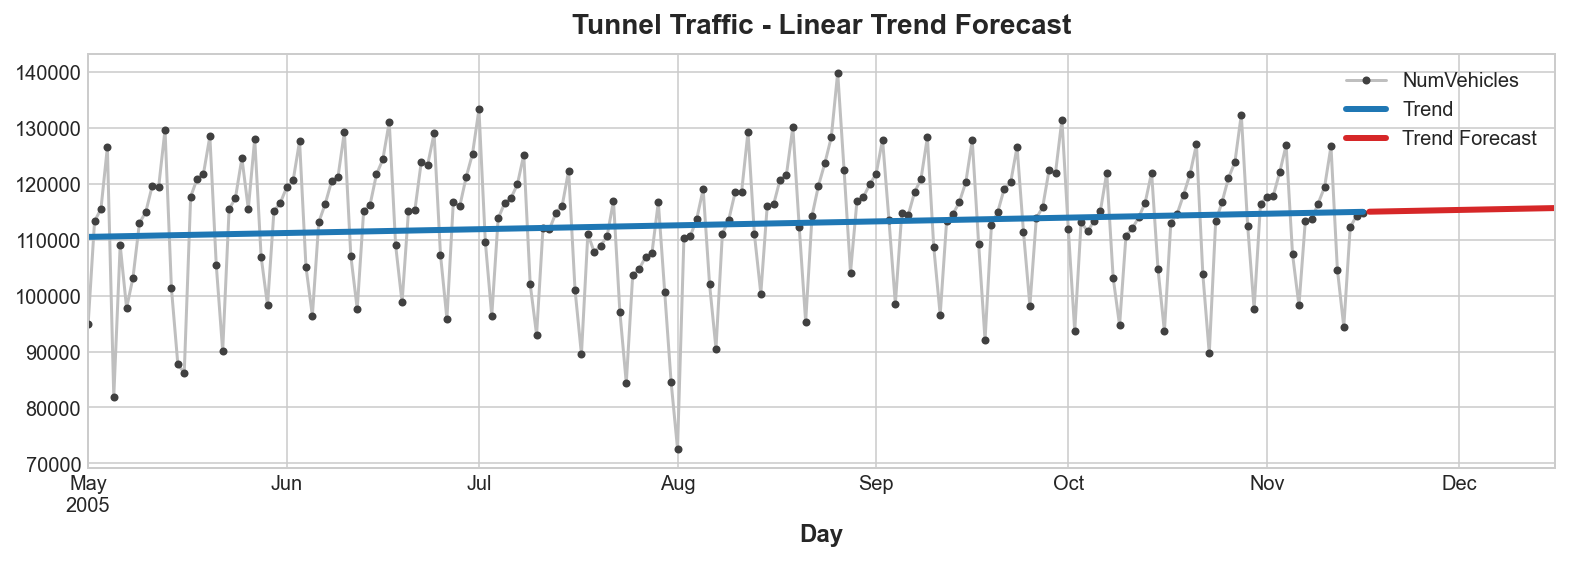

In [33]:
ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()